In [232]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('../runthrough/raw_data/master_loan_tape.csv')

date_cols = [c for c in df.columns.to_list() if 'Dt' in c]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df

,GP,Note_Yr,Note_Mth,NoteDt,LoanAmt,MaturityDt,MaturityMthsQty,PrepayDt,PrepayMthsQty,DefaultDt,DefaultMthsQty,PP_qty,MatBucket,Code,CodeText,Margin,MarginBucket,state_abbreviation,state_name
0,1502649,2000,7,2000-07-31,20600.00,2007-07-31,84,2008-10-08,NaN,2006-03-06,67.00,67.00,0-8,453110.00,Florists,0.04,0.0275+,CT,Connecticut
1,1503079,2001,1,2001-01-31,14288.55,2008-01-31,84,2010-11-30,NaN,2004-03-02,37.00,37.00,0-8,-1.00,NaN,0.03,0.025 - 0.0275,OH,Ohio
2,2019667,2001,2,2001-02-28,3600.00,2003-02-28,24,2002-01-30,11.00,NaT,NaN,11.00,0-8,441310.00,Automotive Parts and Accessories Stores,NaN,NaN,MS,Mississippi
3,2022516,2001,2,2001-02-28,60000.00,2011-02-27,119,2011-09-13,NaN,2010-01-12,106.00,106.00,8-11,722212.00,"Cafeterias, Grill Buffets, and Buffets",0.01,0.0125 - 0.015,NY,New York
4,2039790,2001,7,2001-07-31,20000.02,2006-07-31,60,2005-05-12,45.00,2003-12-31,29.00,29.00,0-8,561499.00,All Other Business Support Services,NaN,NaN,NC,North Carolina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820495,18027786,2022,8,2022-08-22,2329540.00,2047-08-22,300,NaT,NaN,NaT,NaN,NaN,21+,811192.00,"Automotive Repair, Services, And Parking",0.02,0.0175 - 0.02,OH,Ohio
820496,18028014,2022,8,2022-08-26,35000.00,2032-08-12,119,NaT,NaN,NaT,NaN,NaN,8-11,NaN,NaN,0.04,0.0275+,NY,New York
820497,18029633,2022,9,2022-09-23,NaN,2034-09-22,143,NaT,NaN,NaT,NaN,NaN,11-16,NaN,NaN,0.01,0.0125 - 0.015,CA,California
820498,18031120,2022,9,2022-09-21,NaN,2032-09-16,119,NaT,NaN,NaT,NaN,NaN,8-11,524210.00,"Insurance Agents, Brokers, And Service",0.00,NaN,CO,Colorado


In [233]:
df[(df['MatBucket']=='21+')|(df['MatBucket']=='8-11')][['LoanAmt']].mean()

LoanAmt   609452.40
dtype: float64

In [193]:
df = df.sort_values(by=['Note_Yr','Note_Mth'])
df = df[df['Note_Yr']<=2022]
yr_mth = df[df['Note_Yr']<=2022][['Note_Yr','Note_Mth']].drop_duplicates()

user_df = df[df['MatBucket']=='21+']

In [194]:
test = user_df[['GP','NoteDt','Note_Yr','Note_Mth','PrepayDt','DefaultDt','PP_qty']].copy()

test['NoteDt'] = pd.to_datetime(test['NoteDt'])
test['stop_counting_date'] = test[['DefaultDt','PrepayDt']].min(axis=1)
test = test[['GP','NoteDt','Note_Yr','Note_Mth','PP_qty','stop_counting_date']].reset_index().drop(columns='index')

test

,GP,NoteDt,Note_Yr,Note_Mth,PP_qty,stop_counting_date
0,1477340,2000-01-31,2000,1,7.00000,2000-09-22
1,1472083,2000-01-31,2000,1,10.00000,2000-12-19
2,826902,2000-01-31,2000,1,43.00000,2003-08-31
3,1478651,2000-01-31,2000,1,9.00000,2000-11-30
4,1481972,2000-01-31,2000,1,99.00000,2008-05-14
...,...,...,...,...,...,...
124801,18029742,2022-10-05,2022,10,NaN,NaT
124802,18027214,2022-10-07,2022,10,NaN,NaT
124803,18032979,2022-10-03,2022,10,NaN,NaT
124804,18026608,2022-10-01,2022,10,NaN,NaT


In [195]:
yr_mth = yr_mth.reset_index().drop(columns='index')
yr_mth

,Note_Yr,Note_Mth
0,2000,1
1,2000,2
2,2000,3
3,2000,4
4,2000,5
...,...,...
271,2022,8
272,2022,9
273,2022,10
274,2022,11


In [196]:
min_origination = test['NoteDt'].min().to_period('M')
max_stop_counting = test['stop_counting_date'].max().to_period('M')
monthly_intervals = pd.period_range(start=min_origination, end=max_stop_counting, freq='M')

In [197]:
outstanding_loans = pd.DataFrame(index=monthly_intervals)

outstanding_loans

""
2000-01
2000-02
2000-03
2000-04
2000-05
...
2022-05
2022-06
2022-07
2022-08


In [198]:
def calculate_loan_age(note_date, end_date):
    age_in_days = (end_date - note_date).dt.days
    age_in_months = (age_in_days // 30).astype(int)
    return age_in_months


age_bins = [0, 12, 24, 36, 48, np.inf]
age_labels = ['0-12', '13-24', '25-36', '37-48', '48+']

for interval in monthly_intervals:
    mask = (test['NoteDt'] <= interval.end_time) & (test['stop_counting_date'].isnull() | (test['stop_counting_date'] > interval.start_time))
    loans_in_interval = test.loc[mask]

    # Calculate loan ages in months using the custom function
    loans_in_interval['LoanAge'] = calculate_loan_age(loans_in_interval['NoteDt'], interval.end_time)

    # Bin loans based on LoanAge and count
    loan_counts = loans_in_interval.groupby(pd.cut(loans_in_interval['LoanAge'], bins=age_bins, labels=age_labels, right=False)).size()

    # Update outstanding loans dataframe
    for label, count in loan_counts.items():
        outstanding_loans.loc[interval, label] = count


In [199]:
outstanding_loans

,0-12,13-24,25-36,37-48,48+
2000-01,443.00000,0.00000,0.00000,0.00000,0.00000
2000-02,772.00000,0.00000,0.00000,0.00000,0.00000
2000-03,1226.00000,0.00000,0.00000,0.00000,0.00000
2000-04,1644.00000,0.00000,0.00000,0.00000,0.00000
2000-05,2120.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...
2022-05,10247.00000,7829.00000,4787.00000,5126.00000,25039.00000
2022-06,9994.00000,8400.00000,4722.00000,4994.00000,24985.00000
2022-07,9387.00000,9195.00000,4609.00000,4934.00000,24841.00000
2022-08,8737.00000,9842.00000,4691.00000,4788.00000,24761.00000


In [200]:
prepayment_counts = pd.DataFrame(index=monthly_intervals, columns=age_labels, dtype=int)

for interval in monthly_intervals:
    # Create a mask to filter loans within the current interval
    mask = (test['NoteDt'] <= interval.end_time) & ((test['stop_counting_date'] <= interval.end_time) & (test['stop_counting_date'] >= interval.start_time))

    # Select loans within the interval
    loans_in_interval = test.loc[mask]

    # Calculate loan ages in months using the updated `calculate_loan_age` function
    loans_in_interval['LoanAge'] = calculate_loan_age(loans_in_interval['NoteDt'], interval.end_time)

    # Bin loans based on LoanAge and count the prepayments
    prepayment_counts.loc[interval, :] = loans_in_interval.groupby(pd.cut(loans_in_interval['LoanAge'], bins=age_bins, labels=age_labels, right=False))['PP_qty'].count()



In [201]:
smms = prepayment_counts / (prepayment_counts+outstanding_loans)

cprs = (1-(1-smms)**12)*100
outstanding_loans.head(25)

,0-12,13-24,25-36,37-48,48+
2000-01,443.00000,0.00000,0.00000,0.00000,0.00000
2000-02,772.00000,0.00000,0.00000,0.00000,0.00000
2000-03,1226.00000,0.00000,0.00000,0.00000,0.00000
2000-04,1644.00000,0.00000,0.00000,0.00000,0.00000
2000-05,2120.00000,0.00000,0.00000,0.00000,0.00000
2000-06,2621.00000,0.00000,0.00000,0.00000,0.00000
2000-07,2993.00000,0.00000,0.00000,0.00000,0.00000
2000-08,3444.00000,0.00000,0.00000,0.00000,0.00000
2000-09,3827.00000,0.00000,0.00000,0.00000,0.00000
2000-10,4201.00000,0.00000,0.00000,0.00000,0.00000


<Axes: title={'center': 'Distribution of MoB for 2018 Cohort'}, ylabel='Frequency'>

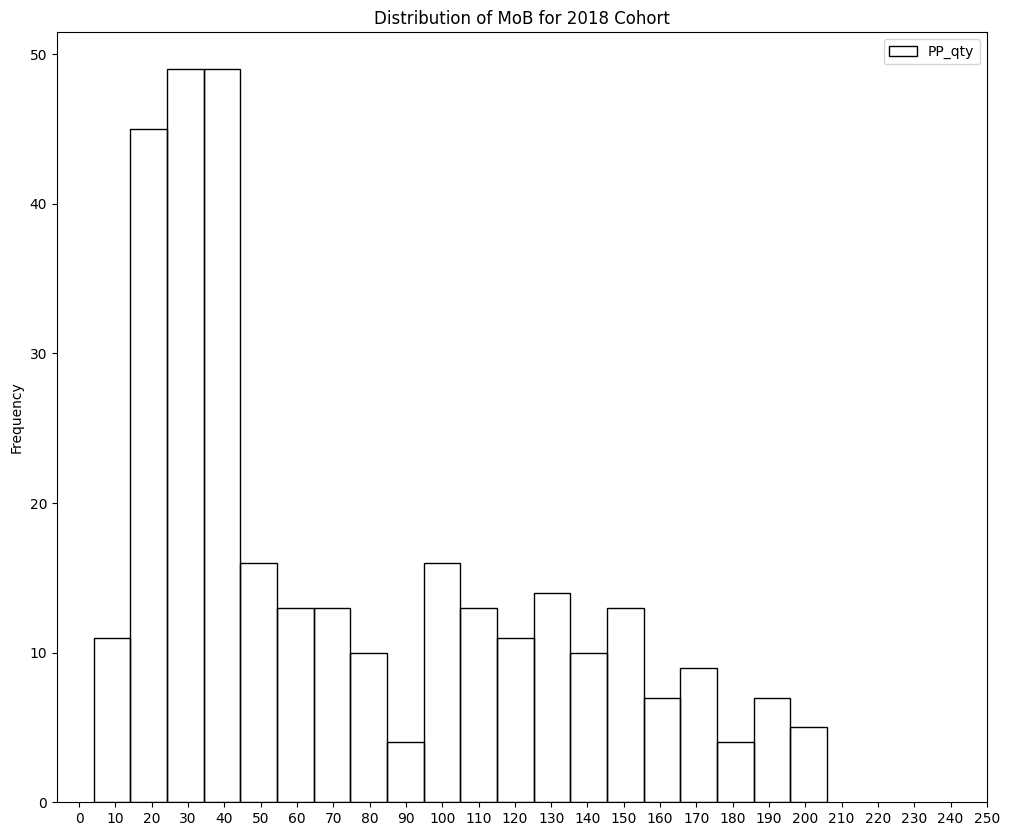

In [202]:
test[(test['Note_Yr']==2005) & (test['Note_Mth']==1)].sort_values('PP_qty')[['PP_qty']].plot(kind='hist',bins=20,fill=False,xticks=list(range(0,251,10)),figsize=(12,10), title='Distribution of MoB for 2018 Cohort')

## REVL loan tape code below ---

In [311]:
revl = pd.read_csv('revl_loantape.csv')
cols = revl.columns.to_list()
cols = [c.replace('\n', ' ') for c in cols]
revl.columns = cols
cols
pmt_cols = [c for c in cols if '20' in c]


In [312]:
test = revl[revl['GP#'].duplicated(keep=False)].sort_values('GP#')
test = test[['GP#']+pmt_cols].set_index('GP#').transpose()

def flatten(in_arr:list)->list:
    return [item for sublist in in_arr for item in sublist]

duplicate_gps = test.columns.to_list()
date_index = test.index.to_list()
data = {}
for idx, c in enumerate(duplicate_gps):
    if idx > 0:
        balances = test[duplicate_gps[idx-1]].values
        filled_balances = np.where(np.isnan(balances), np.roll(balances, 1, axis=1), balances)
        zeros_count = np.count_nonzero(filled_balances == 0, axis=0)

        index_with_less_zeros = int(zeros_count[1] < zeros_count[0])
        
        
        data[c] = (filled_balances[:, index_with_less_zeros])
        
        
x = pd.DataFrame(data).transpose()
x.columns = date_index


In [313]:
to_fix = x.index.to_list()
revl = revl.sort_values('GP#')
x = x.sort_index().reset_index().rename(columns={'index':'GP#'})

x


,GP#,4/30/2021,5/30/2021,6/30/2021,7/31/2021,8/30/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,...,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023
0,1003587004,0.00,0.00,744893.83,743841.17,742050.63,740060.20,734235.44,732886.00,731054.00,...,712895.09,712895.09,712895.09,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16,711978.16
1,1010478806,0.00,0.00,0.00,0.00,0.00,0.00,988154.50,986546.43,980902.10,...,966709.06,963883.16,963883.16,963122.01,948791.88,948791.88,947587.36,945056.48,615656.48,346243.72
2,1010659100,0.00,0.00,0.00,0.00,0.00,0.00,1656900.00,1654719.88,1650875.76,...,1625905.46,1623685.85,1622197.92,1619766.36,1617674.37,1616541.66,1612116.06,1612116.06,1612116.06,1609488.52
3,1011169108,0.00,0.00,0.00,0.00,0.00,0.00,3732543.50,3726125.87,3716470.75,...,3661124.79,3654980.25,3648828.66,3645937.08,3640552.34,3636111.90,3634078.14,3634078.14,3631929.20,3630169.31
4,1012799100,0.00,0.00,0.00,0.00,0.00,0.00,569105.88,569105.88,567327.59,...,558586.82,557822.48,557309.65,556472.61,555752.23,555360.78,554601.04,553835.71,553835.71,552923.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,9974249009,0.00,0.00,0.00,0.00,0.00,0.00,195371.78,194115.67,192181.13,...,180689.96,179508.26,178245.52,177170.34,175880.59,174729.40,172403.43,172403.43,171235.24,170073.67
3795,9976039009,0.00,0.00,0.00,0.00,0.00,0.00,330930.00,330067.88,329577.51,...,324851.42,324440.93,323965.77,323647.74,323252.04,322928.86,322674.38,322159.20,321898.34,321572.73
3796,9976817407,433198.39,430576.43,428652.80,426507.66,424428.02,422477.67,420378.16,418268.29,416216.77,...,397521.76,395817.83,394216.92,392533.46,390934.76,389311.11,387650.15,0.00,0.00,0.00
3797,9986179009,0.00,0.00,0.00,0.00,0.00,0.00,196580.94,196231.31,195907.13,...,191491.87,190884.01,190187.48,189326.34,188501.23,187759.77,186974.15,185960.89,185081.83,184045.02


In [314]:
# Drop duplicates, keep rows with NAICS code 
y = revl[revl['GP#'].duplicated(keep=False)]
y = y[y['SIC / NAICS'].notna()]

y = y.set_index('GP#').merge(x.set_index('GP#'), left_index=True,right_index=True)

y = y.drop(columns=[i+'_x' for i in pmt_cols])

y = y.rename(columns={col+'_y':col for col in pmt_cols}).reset_index()

# Next I need to take this subset and map out the right row with priority to the newest deal -- I could potentially turn this into a database project. Maybe I should...

old_deals = ['2018-2','2019-2','2017-1/2021-1A','2019-1','REVL 2021-1','REVL 2021-2']

# Find duplicates where the old deal is in the Deal column on the y dataframe which contains duplicated GPs
to_remove = y[( y['GP#'].duplicated() ) & (y['Deal'].isin(old_deals)) & (y['Legacy Mapping'].notna())].index.to_list()

to_check = y[~y.index.isin(to_remove)]['GP#'].values

y  = y[~y.index.isin(to_remove)]

# Now drop the rest of the dupes keeping the last appearing duplicate
y = y.drop_duplicates(subset='GP#',keep='last')

to_check1 = y['GP#'].to_list()
print(y.shape)

(3799, 47)


In [315]:
# Get the GPs from old deals that prepaid before being restructured
old_no_restruct = revl[( ~revl['GP#'].isin(to_check) ) & (revl['Deal'].isin(old_deals)) & (revl['Legacy Mapping'].isna() ) ]

# revl[( ~revl['GP#'].isin(to_check) ) & (revl['Deal'].isin(old_deals)) & (revl['Legacy Mapping'].isna() ) ]
to_check2 = old_no_restruct['GP#'].to_list()

temp = revl[~revl['GP#'].isin(to_check1)]
temp = temp[~temp['GP#'].isin(to_check2)]

In [316]:
old_no_restruct.shape

(440, 47)

In [317]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

target = pd.concat( [y,old_no_restruct,temp], axis=0 )

test_ = pd.DataFrame(target.groupby('Deal').sum()['6/30/2023'].round(2)).reset_index()

samp = test_[test_['Deal'].isin(old_deals)]['6/30/2023'].sum()

cond = (test_.iloc[-1]['6/30/2023'] + samp) ==  1_885_458_306.35

# These are the values that true up 2023-1 with the REVL 2022-1 / -2 GPs that were restructured: samp + test_ last row (2023-1) ties out to that balance of 1.8 billion in the MPL workbook
samp = target.loc[( target['Deal'].isin(['REVL 2021-1','REVL 2021-2']) ) & (target['3/31/2022'] > 0) ]['6/30/2023'].sum()

target.loc[( target['Deal'].isin(['REVL 2021-1','REVL 2021-2']) ) & (target['3/31/2022'] > 0) , 'Deal'] = 'REVL 2023-1'


target['Borrower Name'] = target['Borrower Name'].str.strip()
target = target.rename(columns={ 'GP#': 'GP' })                   

In [318]:
target['Lender'] = target['Lender'].str.upper()
target['Lender'] = target['Lender'].fillna('0')



In [319]:
found_lenders = pd.read_csv('missing_lenders.csv')
found_lenders = found_lenders[~found_lenders['Monthly File'].str.contains('0')]

In [320]:

target = target.set_index('GP')
revl_pp_data = pd.read_csv('revl_prepay_data.csv', index_col='GP')
target = target.merge(revl_pp_data, left_index=True, right_index=True, how='outer')
target = target.merge(found_lenders.set_index('GP'), left_index=True, right_index=True, how='outer')
target.loc[target['Monthly File'].notna(), ['Lender_x', 'Lender_y'] ] = target['Monthly File']
target = target.drop(columns='Monthly File')

In [321]:
def rename_a_shitload_of_columns(in_dict:dict, in_df:pd.DataFrame)->pd.DataFrame:
    df = in_df.copy()
    for k, v in in_dict.items():
        df = df.rename(columns={k:v})
    return df

col_names = {'Note  Date': 'NoteDt', 'SIC / NAICS': 'Code', 'Note Maturity':'MaturityDt', 'Industry':'CodeText'}

target = rename_a_shitload_of_columns(col_names, target)

In [322]:
target['Term_x'].isna().sum()

0

In [323]:
target['NoteDt'] = pd.to_datetime(target['NoteDt'])
target['Note_Yr'] = target['NoteDt'].dt.year
target['Note_Mth'] = target['NoteDt'].dt.month
target.loc[(target['vol_invol']=='Involuntary'),'DefaultDt'] = target['PrepayDt']
target['PrepayDt'] = pd.to_datetime(target['PrepayDt'])
target['DefaultDt'] = pd.to_datetime(target['DefaultDt'])
if 'Note Date' in target.columns:
    target = target.drop(columns='Note Date')

test = target[['NoteDt','Note_Yr','Note_Mth','PrepayDt','DefaultDt','PP_qty','Term_x']]
test=test[test['Term_x']>=252]

test['stop_counting_date'] = test['PrepayDt']
test = test.reset_index()

yr_mth = test[['Note_Yr','Note_Mth']].drop_duplicates()
yr_mth = yr_mth.reset_index().drop(columns='index')

min_origination = test['NoteDt'].min().to_period('M')
max_stop_counting = test['stop_counting_date'].max().to_period('M')
monthly_intervals = pd.period_range(start=min_origination, end=max_stop_counting, freq='M')

outstanding_loans = pd.DataFrame(index=monthly_intervals)



In [324]:
test

,GP,NoteDt,Note_Yr,Note_Mth,PrepayDt,DefaultDt,PP_qty,Term_x,stop_counting_date
0,1000779108,2021-06-18,2021,6,NaT,NaT,NaN,301,NaT
1,1001459108,2021-07-22,2021,7,NaT,NaT,NaN,300,NaT
2,1003587004,2017-10-18,2017,10,NaT,NaT,NaN,300,NaT
3,1006629110,2021-06-18,2021,6,2022-09-30,NaT,15.00,301,2022-09-30
4,1008289108,2021-06-18,2021,6,NaT,NaT,NaN,300,NaT
...,...,...,...,...,...,...,...,...,...
5276,9990289010,2021-10-29,2021,10,NaT,NaT,NaN,300,NaT
5277,9991349006,2021-06-15,2021,6,NaT,NaT,NaN,300,NaT
5278,9991439009,2021-06-14,2021,6,NaT,NaT,NaN,306,NaT
5279,9991989010,2021-06-11,2021,6,NaT,NaT,NaN,301,NaT


In [325]:

age_bins = [0, 12, 24, 36, 48, np.inf]
age_labels = ['0-12', '13-24', '25-36', '37-48', '48+']

for interval in monthly_intervals:
    mask = (test['NoteDt'] <= interval.end_time) & (test['stop_counting_date'].isnull() | (test['stop_counting_date'] > interval.start_time))
    loans_in_interval = test.loc[mask]

    # Calculate loan ages in months using the custom function
    loans_in_interval['LoanAge'] = calculate_loan_age(loans_in_interval['NoteDt'], interval.end_time)

    # Bin loans based on LoanAge and count
    loan_counts = loans_in_interval.groupby(pd.cut(loans_in_interval['LoanAge'], bins=age_bins, labels=age_labels, right=False)).size()

    # Update outstanding loans dataframe
    for label, count in loan_counts.items():
        outstanding_loans.loc[interval, label] = count



In [326]:
target.columns

Index(['Legacy Mapping', 'Deal_x', 'Borrower Name', 'City_x', 'State_x',
       'Code', 'ADJ', 'Accrual', 'NoteDt', 'Year', 'Note  Maturity',
       'Interest  Paid To Date', 'Loan Spread', 'Loan Rate', 'Strip  Rate',
       'Term_x', 'Original Balance', 'CodeText', 'Lender_x', '4/30/2021',
       '5/30/2021', '6/30/2021', '7/31/2021', '8/30/2021', '9/30/2021',
       '10/31/2021', '11/30/2021', '12/31/2021', '1/31/2022', '2/28/2022',
       '3/31/2022', '4/30/2022', '5/31/2022', '6/30/2022', '7/31/2022',
       '8/31/2022', '9/30/2022', '10/31/2022', '11/30/2022', '12/31/2022',
       '1/31/2023', '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023',
       '6/30/2023', 'Deal_y', 'vol_invol', 'Borrower', 'Lender_y', 'City_y',
       'State_y', 'Collateral', ' LoanAmt ', ' pp_amt ', 'PP_qty', 'Margin',
       'PrepayDt', 'Strip Rate', 'Term_y', 'MaturityDt', 'Note_Yr', 'Note_Mth',
       'DefaultDt'],
      dtype='object')

In [327]:
prepayment_counts = pd.DataFrame(index=monthly_intervals, columns=age_labels, dtype=int)

for interval in monthly_intervals:
    # Create a mask to filter loans within the current interval
    mask = (test['NoteDt'] <= interval.end_time) & ((test['stop_counting_date'] <= interval.end_time) & (test['stop_counting_date'] >= interval.start_time))
    print(interval.start_time)
    # Select loans within the interval
    loans_in_interval = test.loc[mask]

    # Calculate loan ages in months using the updated `calculate_loan_age` function
    loans_in_interval['LoanAge'] = calculate_loan_age(loans_in_interval['NoteDt'], interval.end_time)

    # Bin loans based on LoanAge and count the prepayments
    prepayment_counts.loc[interval, :] = loans_in_interval.groupby(pd.cut(loans_in_interval['LoanAge'], bins=age_bins, labels=age_labels, right=False))['PP_qty'].count()

2010-01-01 00:00:00
2010-02-01 00:00:00
2010-03-01 00:00:00
2010-04-01 00:00:00
2010-05-01 00:00:00
2010-06-01 00:00:00
2010-07-01 00:00:00
2010-08-01 00:00:00
2010-09-01 00:00:00
2010-10-01 00:00:00
2010-11-01 00:00:00
2010-12-01 00:00:00
2011-01-01 00:00:00
2011-02-01 00:00:00
2011-03-01 00:00:00
2011-04-01 00:00:00
2011-05-01 00:00:00
2011-06-01 00:00:00
2011-07-01 00:00:00
2011-08-01 00:00:00
2011-09-01 00:00:00
2011-10-01 00:00:00
2011-11-01 00:00:00
2011-12-01 00:00:00
2012-01-01 00:00:00
2012-02-01 00:00:00
2012-03-01 00:00:00
2012-04-01 00:00:00
2012-05-01 00:00:00
2012-06-01 00:00:00
2012-07-01 00:00:00
2012-08-01 00:00:00
2012-09-01 00:00:00
2012-10-01 00:00:00
2012-11-01 00:00:00
2012-12-01 00:00:00
2013-01-01 00:00:00
2013-02-01 00:00:00
2013-03-01 00:00:00
2013-04-01 00:00:00
2013-05-01 00:00:00
2013-06-01 00:00:00
2013-07-01 00:00:00
2013-08-01 00:00:00
2013-09-01 00:00:00
2013-10-01 00:00:00
2013-11-01 00:00:00
2013-12-01 00:00:00
2014-01-01 00:00:00
2014-02-01 00:00:00


In [328]:
smms = prepayment_counts / (prepayment_counts+outstanding_loans)

cprs = (1-(1-smms)**12)
outstanding_loans.head(25)

,0-12,13-24,25-36,37-48,48+
2010-01,1.00,0.00,0.00,0.00,0.00
2010-02,1.00,0.00,0.00,0.00,0.00
2010-03,1.00,0.00,0.00,0.00,0.00
2010-04,1.00,0.00,0.00,0.00,0.00
2010-05,2.00,0.00,0.00,0.00,0.00
2010-06,2.00,0.00,0.00,0.00,0.00
2010-07,2.00,0.00,0.00,0.00,0.00
2010-08,2.00,0.00,0.00,0.00,0.00
2010-09,2.00,0.00,0.00,0.00,0.00
2010-10,2.00,0.00,0.00,0.00,0.00


In [329]:
# cprs.to_csv('revl_cprs_21+.csv')

In [330]:
cprs

,0-12,13-24,25-36,37-48,48+
2010-01,0.00,NaN,NaN,NaN,NaN
2010-02,0.00,NaN,NaN,NaN,NaN
2010-03,0.00,NaN,NaN,NaN,NaN
2010-04,0.00,NaN,NaN,NaN,NaN
2010-05,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-02,0.02,0.05,0.09,0.22,0.16
2023-03,0.02,0.04,0.12,0.07,0.18
2023-04,0.02,0.07,0.27,0.33,0.18
2023-05,0.02,0.08,0.20,0.15,0.20


In [331]:
revl_pp_data = revl_pp_data.rename(columns={' pp_amt ':'pp_amt'})


In [332]:
revl_pp_data['pp_amt'] = revl_pp_data['pp_amt'].str.replace(',','')

revl_pp_data['pp_amt'] = revl_pp_data['pp_amt'].astype(float)

In [333]:
revl_pp_data['PrepayDt'] = pd.to_datetime(revl_pp_data['PrepayDt'])
revl_pp_data['pp_yr'] = revl_pp_data['PrepayDt'].dt.year
revl_pp_data['pp_mth'] = revl_pp_data['PrepayDt'].dt.month

revl_pp_data.groupby(['pp_yr','Lender']).agg({'pp_amt':'sum'}).to_csv('prepayment_by_lender.csv')

In [334]:
revl_pp_data.columns

Index(['Deal', 'vol_invol', 'Borrower', 'Lender', 'City', 'State',
       'Collateral', ' LoanAmt ', 'pp_amt', 'PP_qty', 'Margin', 'PrepayDt',
       'Strip Rate', 'Term', 'Note Date', 'Note Maturity', 'Note_Yr', 'pp_yr',
       'pp_mth'],
      dtype='object')

In [335]:
revl_pp_data[revl_pp_data['pp_yr']==2023].groupby(['Lender']).agg({'pp_amt':'sum'})

,pp_amt
Lender,
0,215471773.93
1ST COLONIAL COMMUNITY BANK,364785.40
AMERIS BANK,780878.17
ARIZONA FCU,243374.49
ARIZONA FINANCIAL CREDIT UNION,186501.17
...,...
United Midwest Savings Bank,635053.61
"VELOCITYSBA, LLC",1161743.31
WALLIS BANK,4126051.73


In [336]:
revl_pp_data['Lender'] = revl_pp_data['Lender'].fillna('0')
target['Lender_x'] = target['Lender_x'].fillna('0')
target['Lender_y'] = target['Lender_y'].fillna('0')

mask = revl_pp_data['Lender'].str.contains('0')

revl_pp_data['Lender'] = revl_pp_data['Lender'].str.upper()
target['Lender_x'] = target['Lender_x'].str.upper()
target['Lender_y'] = target['Lender_y'].str.upper()

revl_pp_data.loc[revl_pp_data['Lender'].str.contains('ARIZONA F'), 'Lender'] = 'ARIZONA FCU'
target.loc[target['Lender_y'].str.contains('ARIZONA F'), 'Lender_x'] = 'ARIZONA FCU'
target.loc[target['Lender_y'].str.contains('ATLANTIC'), 'Lender_x']  = 'ATLANTIC CAPITAL BANK, NATIONAL ASSOCIATION'

target['Lender_x'] = target['Lender_y']


In [337]:
from typing import Optional
def merge_all(ordered_merge_list:list, _how:str, _on:Optional[str]=None )->pd.DataFrame:
    """Merge a list of dataframes until noe are left"""
    if len(ordered_merge_list)==1:
        return ordered_merge_list[0]
    else:
        left = ordered_merge_list[0]
        right = ordered_merge_list[1:]
        return merge_all( [left.merge(right[0], how=_how, on=_on )]+right[1:], _how=_how, _on=_on )
    
    

In [338]:
revl_pp_data

,Deal,vol_invol,Borrower,Lender,City,State,Collateral,LoanAmt,pp_amt,PP_qty,Margin,PrepayDt,Strip Rate,Term,Note Date,Note Maturity,Note_Yr,pp_yr,pp_mth
GP,,,,,,,,,,,,,,,,,,,
3762137009,REVL 2021-1,Involuntary,"Symposium of Tampa, LLC",AQUESTA BANK,Indian Shores,FL,25.00,"874,495.50",843537.97,23,0.03,2021-04-30,0.01,300,6/14/2019,6/14/2044,2019,2021,4
1214627003,REVL 2021-1,Involuntary,Joebec LLC,CIBM BANK,New Berlin,WI,25.00,"175,660.67",169207.56,43,0.02,2021-05-31,0.00,300,11/13/2017,11/13/2042,2017,2021,5
3672307008,REVL 2021-1,Voluntary,"Midtown Lash, LLC",SPIRIT OF TEXAS BANK,Sacramento,CA,10.00,"300,375.00",289054.07,17,0.03,2021-05-31,0.01,120,1/15/2020,1/15/2030,2020,2021,5
2066767001,REVL 2021-1,Involuntary,Lake Alfred Self Storage LLC,LIVE OAK BANKING CO.,North Salt Lake,UT,26.00,"1,574,741.09",1563712.59,40,0.02,2021-05-31,0.01,312,2/9/2018,2/9/2044,2018,2021,5
2885547009,REVL 2021-1,Voluntary,"Auto Pros1, LLC",CELTIC BANK,Pinellas Park,FL,26.00,"311,671.70",304481.09,32,0.03,2021-05-31,0.02,309,9/28/2018,6/28/2044,2018,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283138901,REVL 2023-1,Voluntary,"JCOS, LLC Massage Supply Depot, LLC",INCREDIBLEBANK,Chicago,IL,NaN,"561,150.00",543417.26,26,0.02,2023-06-30,0.03,300,5/7/2021,5/7/2046,2021,2023,6
4198018704,REVL 2023-1,Voluntary,"Jaime's Auto Repair, Inc.",THE FIRST BANK,Lawrenceville,GA,NaN,"311,850.00",305801.80,25,0.03,2023-06-30,0.03,300,6/11/2021,6/11/2046,2021,2023,6
4441618904,REVL 2023-1,Voluntary,A & O Plumbing Corp,BERKSHIRE BANK,Palmetto Bay,FL,NaN,"2,976,750.00",2820185.44,25,0.01,2023-06-30,0.01,300,5/17/2021,5/17/2046,2021,2023,6


In [341]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

x = revl_pp_data[revl_pp_data['pp_yr']==2023].groupby(['Lender']).agg({'pp_amt':'sum'})

cols_23 =[c for c in target.columns if '23' in c]

x['pct of prepayment'] = x['pp_amt'] / x['pp_amt'].sum()

balance_dfs = []
balance_dfs.append(x.reset_index())
for c in cols_23:
    balance_dfs.append(target.groupby('Lender_x').agg({c:'sum'}).reset_index().rename(columns={'Lender_x':'Lender'}))


lender_pp = merge_all(balance_dfs, _how='left', _on= 'Lender')


lender_pp['check'] =lender_pp[[c for c in lender_pp.columns if '23' in c]].sum(axis=1)



# balance_dfs[0]
# lender_pp

lender_pp['portfolio_ratio'] = lender_pp['1/31/2023'] / lender_pp['1/31/2023'].sum()

lender_pp

,Lender,pp_amt,pct of prepayment,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,check,portfolio_ratio
0,0,265967791.16,0.63,5185750805.45,5124284630.28,5028952081.36,4951864001.08,4879662307.53,4862000783.54,30032514609.24,0.88
1,1ST COLONIAL COMMUNITY BANK,364785.40,0.00,367788.17,366989.87,364785.40,0.00,0.00,0.00,1099563.44,0.00
2,ALLIED FIRST BANK,140228.79,0.00,101678.39,100859.99,100092.27,99205.22,98372.36,97542.27,597750.50,0.00
3,AMERIS BANK,780878.17,0.00,2722654.71,1934803.99,1929979.37,1922576.93,1840579.96,1832727.34,12183322.30,0.00
4,ARIZONA FCU,429875.66,0.00,243374.49,243374.49,0.00,0.00,0.00,0.00,486748.98,0.00
...,...,...,...,...,...,...,...,...,...,...,...
116,US METRO BANK,818238.88,0.00,19794527.86,19738745.79,47575175.09,47517530.13,47487803.76,47432652.35,229546434.98,0.00
117,"VELOCITYSBA, LLC",1161743.31,0.00,2589290.73,2586172.88,6060542.13,6944733.51,5776644.27,5769585.87,29726969.39,0.00
118,WALLIS BANK,4126051.73,0.01,42284269.03,42234789.89,41773699.57,41768785.82,41730190.68,37930852.73,247722587.72,0.01
119,WEST TOWN BANK & TRUST,378752.01,0.00,473173.03,471963.99,470861.15,469339.86,468185.77,88625.96,2442149.76,0.00


In [349]:
target.groupby('Lender_x').count()[['Note_Yr']].iloc[0:].sort_values('Note_Yr', ascending=False)

,Note_Yr
Lender_x,
0,6319
THE HUNTINGTON NATIONAL BANK,85
"HARVEST SMALL BUSINESS FINANCE, LLC",76
LIVE OAK BANKING COMPANY,67
KEYBANK NATIONAL ASSOCIATION,58
...,...
"HOME BANK, SB",1
DAKOTA BUSINESS LENDING,1
"HOME LOAN INVESTMENT BANK, FSB",1


Lender_y                           
0                                      6319
THE HUNTINGTON NATIONAL BANK             85
HARVEST SMALL BUSINESS FINANCE, LLC      76
LIVE OAK BANKING COMPANY                 67
KEYBANK NATIONAL ASSOCIATION             58
                                       ... 
HOME BANK, SB                             1
DAKOTA BUSINESS LENDING                   1
HOME LOAN INVESTMENT BANK, FSB            1
CENTERSTONE SBA LENDING                   1
COLORADO LENDING SOURCE LTD.              1
Name: count, Length: 405, dtype: int64

In [340]:
target.loc[target['Lender_y'].str.contains('ALLIED')][['Lender_x','Lender_y']]
        #    , 'Lender_x'] = 'ARIZONA FCU'

,Lender_x,Lender_y
GP,,
3977967008,ALLIED FIRST BANK,ALLIED FIRST BANK
4224947002,ALLIED FIRST BANK,ALLIED FIRST BANK


In [ ]:
target